In [13]:
import glob
import cv2
from skin_segmentation import *
from os.path import exists
import matplotlib.pyplot as plt

In [12]:
out_masks = {}
for filename in glob.glob("./Dataset/full_coco/images/*.jpg"):
    mask1 = filename.replace("images", "combined_masks_by_category").replace(".jpg", "_category1.jpg")
    mask2 = filename.replace("images", "combined_masks_by_category").replace(".jpg", "_category2.jpg")
    input_image = cv2.imread(filename)
    if exists(mask1):
        tmp_mask = cv2.imread(mask1, cv2.IMREAD_GRAYSCALE) / 255
        tmp_mask = tmp_mask.astype('uint8')
        masked = apply_mask(input_image, tmp_mask)
        out_filename = mask1.replace("combined_masks_by_category", "images_masks_applied")
        out_masks[out_filename] = masked

    if exists(mask2):
        tmp_mask = cv2.imread(mask2, cv2.IMREAD_GRAYSCALE) / 255
        tmp_mask = tmp_mask.astype('uint8')
        masked = apply_mask(input_image, tmp_mask)
        out_filename = mask2.replace("combined_masks_by_category", "images_masks_applied")
        out_masks[out_filename] = masked

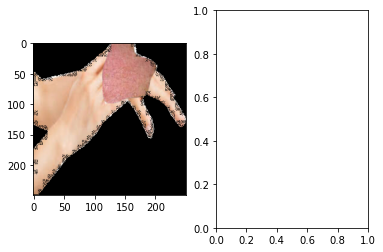

In [23]:
trial_key = list(out_masks.keys())[2]

f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(out_masks[trial_key], cv2.COLOR_BGR2RGB))
plt.show()